In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance_matrix
     

In [2]:
def update_q(q, dist_mat, state, action, alpha=0.012, gamma=0.9):
   immed_reward =dist_mat[state,action]  
   delayed_reward = q[action,:].max()
   q[state,action] += alpha * (immed_reward + gamma * delayed_reward - q[state,action]) # Q(s,a) = Q(s,a)+ alpha *(R(s,a) + gamma* max Q(s',a') - Q(s,a))
   return q
def find_the_best():
  q = np.zeros([n,n]) 
  epsilon = 1. 
  n_train = 8000 
  for i in range(n_train): 
    traj = [0] 
    state = 0
    possible_actions = [ dest for dest in range(n) if dest not in traj] 
    
    while possible_actions: 
      if random.random() < epsilon: 
        action = random.choice(possible_actions) 
      else:  
        best_action_index = q[state, possible_actions].argmax() 
        action = possible_actions[best_action_index] 
      q = update_q(q, dist_mat, state, action)
      traj.append(action) 
      state = traj[-1] 
      possible_actions = [ dest for dest in range(n) if dest not in traj] 
    
    action = 0
    q = update_q(q, dist_mat, state, action) 
    traj.append(0) 
    epsilon = 1. - i * 1/n_train
  traj = [0] 
  state = 0
  distance_travel = 0.
  possible_actions = [ dest for dest in range(n) if dest not in traj ] 
  while possible_actions: # until all destinations are visited 
     best_action_index = q[state, possible_actions].argmax() 
     action = possible_actions[best_action_index] 
     distance_travel += dist_mat[state, action] 
     traj.append(action) 
     state = traj[-1] 
     possible_actions = [ dest for dest in range(n) if dest not in traj ] 
  # Back to the first node
  action = 0
  distance_travel += dist_mat[state, action] 
  traj.append(action) 
 
 
  print('Best trajectory found:') 
  print(' -> '.join([str(b) for b in traj])) 
  print(f'Distance Travelled: {-1*distance_travel}')
  return(traj)

def plot_the_best(traj):
  plt.scatter(coords[:,0],coords[:,1])
  for i in traj:
    plt.plot([coords[traj[i],0],coords[traj[i+1],0]],[coords[traj[i],1],coords[traj[i+1],1]])

Best trajectory found:
0 -> 1 -> 2 -> 3 -> 0
Distance Travelled: 1.10180146


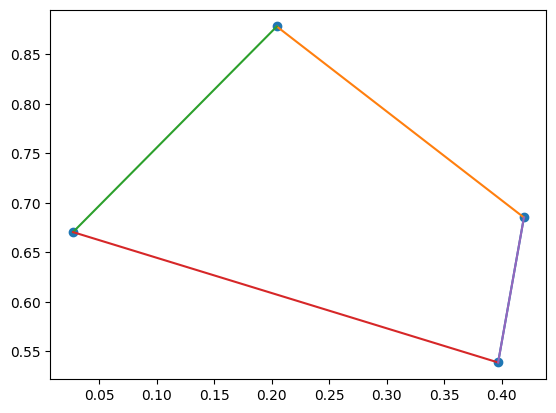

In [3]:
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])
dist_mat=-1*dist_mat
n=4
traj=find_the_best()
plot_the_best(traj)

Best trajectory found:
0 -> 3 -> 1 -> 4 -> 2 -> 0
Distance Travelled: 11.52145127


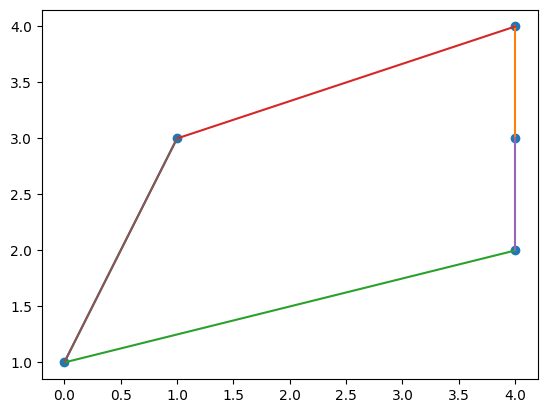

In [4]:
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat=-1*dist_mat
n=5
traj=find_the_best()
plot_the_best(traj)


In [5]:
def get_graph_mat(n, size=1):
#    """ Throws n nodes uniformly at random on a square, and build a (fully connected) graph.
#        Returns the (N, 2) coordinates matrix, and the (N, N) matrix containing pairwise euclidean distances.
#    """
    coords = size * np.random.uniform(size=(n,2))
    dist_mat = distance_matrix(coords, coords)
    return coords, dist_mat
n=3
coords,dist_mat=get_graph_mat(4)
#dist_mat*=-1
coords,dist_mat

(array([[0.06406816, 0.42139798],
        [0.45315748, 0.47292414],
        [0.9953739 , 0.71432442],
        [0.29452528, 0.26788578]]),
 array([[0.        , 0.39248624, 0.97628698, 0.27690518],
        [0.39248624, 0.        , 0.59352568, 0.25923909],
        [0.97628698, 0.59352568, 0.        , 0.83096103],
        [0.27690518, 0.25923909, 0.83096103, 0.        ]]))

Best trajectory found:
0 -> 7 -> 3 -> 2 -> 1 -> 4 -> 5 -> 9 -> 6 -> 8 -> 0
Distance Travelled: 3.3932279800000007


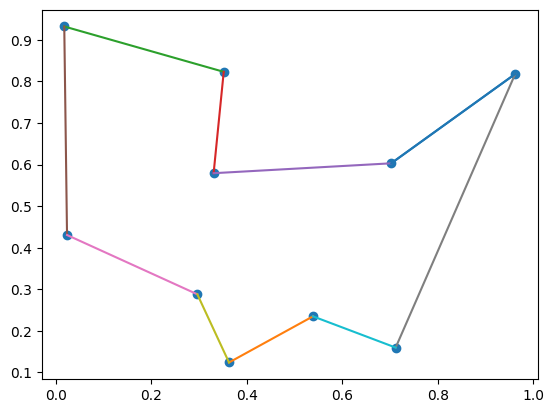

In [6]:
n=10
coords=np.array([[0.96222682, 0.81789497],
       [0.01782511, 0.93226486],
       [0.3518051 , 0.82315222],
       [0.33063835, 0.57929051],
       [0.02360734, 0.4305754 ],
       [0.29650064, 0.28795597],
       [0.53866827, 0.23490321],
       [0.70254764, 0.60307924],
       [0.71190645, 0.15977665],
       [0.36290907, 0.12392136]])

dist_mat=np.array([[-0.        , -0.95130178, -0.61044436, -0.67515633, -1.01539302,
        -0.85089758, -0.72061171, -0.33701494, -0.70411647, -0.91694118],
       [-0.95130178, -0.        , -0.35135197, -0.47163865, -0.50172278,
        -0.70199288, -0.87039697, -0.75974214, -1.03850227, -0.87892102],
       [-0.61044436, -0.35135197, -0.        , -0.2447786 , -0.51169359,
        -0.5380461 , -0.61721531, -0.41406816, -0.75481132, -0.69931902],
       [-0.67515633, -0.47163865, -0.2447786 , -0.        , -0.34115133,
        -0.29332781, -0.40234197, -0.37266932, -0.5668838 , -0.45651119],
       [-1.01539302, -0.50172278, -0.51169359, -0.34115133, -0.        ,
        -0.30791404, -0.55097675, -0.70051232, -0.73965373, -0.45734272],
       [-0.85089758, -0.70199288, -0.5380461 , -0.29332781, -0.30791404,
        -0.        , -0.24791079, -0.51398137, -0.43473202, -0.17696732],
       [-0.72061171, -0.87039697, -0.61721531, -0.40234197, -0.55097675,
        -0.24791079, -0.        , -0.40300129, -0.18882655, -0.20786599],
       [-0.33701494, -0.75974214, -0.41406816, -0.37266932, -0.70051232,
        -0.51398137, -0.40300129, -0.        , -0.44340137, -0.58732158],
       [-0.70411647, -1.03850227, -0.75481132, -0.5668838 , -0.73965373,
        -0.43473202, -0.18882655, -0.44340137, -0.        , -0.3508344 ],
       [-0.91694118, -0.87892102, -0.69931902, -0.45651119, -0.45734272,
        -0.17696732, -0.20786599, -0.58732158, -0.3508344 , -0.        ]])
s=find_the_best()
plot_the_best(s)

Best trajectory found:
0 -> 19 -> 4 -> 12 -> 7 -> 15 -> 16 -> 18 -> 3 -> 13 -> 2 -> 9 -> 10 -> 5 -> 17 -> 1 -> 14 -> 8 -> 11 -> 6 -> 0
Distance Travelled: 3.7482540499999994


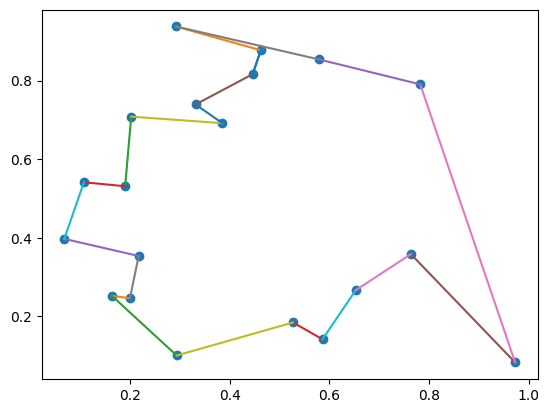

In [7]:
n=20
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
         -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])
s=find_the_best()
plot_the_best(s)

In [8]:
!pip install torchsummary
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from torchsummary import summary
import random

In [9]:
SEED=1
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [10]:
class RLnetwork(nn.Module):
  def __init__(self,hidden1_size,hidden2_size,hidden3_size,hidden4_size,n):
    super().__init__()
    self.layer1=nn.Linear(1,hidden1_size)
    self.hidden1=nn.Linear(hidden1_size,hidden2_size)
    self.hidden2=nn.Linear(hidden2_size,hidden3_size)
    self.hidden3=nn.Linear(hidden3_size,hidden4_size)
    self.hidden4=nn.Linear(hidden4_size,hidden4_size)
    self.out=nn.Linear(hidden4_size,n)

  def forward(self,state):
    layer1=self.layer1(state)
    layer2=F.relu(self.hidden1(layer1))
    layer3=F.relu(self.hidden2(layer2))
    layer4=F.relu(self.hidden3(layer3))
    layer5=F.relu(self.hidden4(layer4))
    output=self.out(layer5)
    return output

In [11]:
def plot_the_best(path):
  plt.scatter(coords[:,0],coords[:,1])
  for i in path:
    plt.plot([coords[path[i],0],coords[path[i+1],0]],[coords[path[i],1],coords[path[i+1],1]])
     

In [12]:
n=4
model=RLnetwork(64,32,32,32,n)
#model=RLnetwork(5,10,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

In [13]:
x=dict()
m=[]
coords=np.array([[0.39676747, 0.53881673],
        [0.41919451, 0.6852195 ],
        [0.20445225, 0.87811744],
        [0.02738759, 0.67046751]])
dist_mat=np. array([[0.        , 0.14811057, 0.39001296, 0.39213955],
        [0.14811057, 0.        , 0.28865872, 0.39208454],
        [0.39001296, 0.28865872, 0.        , 0.27289262],
        [0.39213955, 0.39208454, 0.27289262, 0.        ]])
dist_mat=-1*dist_mat

In [14]:
n=5
model=RLnetwork(64,32,32,32,n)
#model=RLnetwork(5,10,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

In [15]:
x=dict()
m=[]
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat=-1*dist_mat

In [16]:
epsilon=1.
e=1000
for episode in range(e):
  state=0
  path=[state]
  q_s_a_loss=[]
  target_loss=[]

  for i in range(n-1):
    action_prob=model(torch.FloatTensor([state]))
    if epsilon > random.random():      
      q_s_a=random.choice(action_prob)
      action=action_prob.tolist().index(q_s_a)
      while action in path:
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
      #print('action explore',action)         
    else:
      sorted_prob=action_prob.argsort(descending=True)
      #print('action_prob',action_prob,'sorted_prob',sorted_prob)
      for i in sorted_prob:
        if i not in path:
          action=i
          q_s_a=action_prob[i]          
          #print('action exploit',action)
          #print('Q(',state,',',int(i),')','=',float(action_prob[i]))
          break
    q_s_a_loss.append(q_s_a)
    
    next_action_prob=model(torch.FloatTensor([action]))
    sorted_prob=next_action_prob.argsort(descending=True)
    #print('next_action_prob',next_action_prob,'sorted_prob',sorted_prob)
    target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]
    target_loss.append(target)

    
    #print('Q(',int(action),',',int(i),')','=',float(next_action_prob[i]))
    


    path.append(int(action))
    state=int(action)

  qloss=torch.stack(q_s_a_loss).sum()
  tloss=torch.stack(target_loss).sum()
  loss=F.mse_loss(qloss,tloss)
  loss.backward()
  #torch.autograd.set_detect_anomaly(True)
  optimizer.step()
  lr_scheduler.step()
  optimizer.zero_grad()

  epsilon=1-episode/e
  path.append(path[0])
  total_dist=0
  for i in range(len(path)-1):
    total_dist+=dist_mat[path[i],path[i+1]]
  print('episode number {} total distance {}'.format(episode,-total_dist))
  if episode==0:
    x[-total_dist]=path
    m.append(-total_dist)
  if episode>0:
    if -total_dist<m[-1]:
      x[-total_dist]=path
      m.append(-total_dist)


#path=list(x.values())[-1]
#plot_the_best(path)  
  
  
  

episode number 0 total distance 16.285383290000002
episode number 1 total distance 12.359173610000001
episode number 2 total distance 12.87048159
episode number 3 total distance 12.87048159
episode number 4 total distance 15.919796900000001
episode number 5 total distance 16.75751924
episode number 6 total distance 11.52145127
episode number 7 total distance 12.87048159
episode number 8 total distance 16.285383290000002
episode number 9 total distance 16.75751924
episode number 10 total distance 12.359173610000001
episode number 11 total distance 11.52145127
episode number 12 total distance 13.23606798
episode number 13 total distance 16.285383290000002
episode number 14 total distance 13.23606798
episode number 15 total distance 16.285383290000002
episode number 16 total distance 17.63441361
episode number 17 total distance 15.919796900000001
episode number 18 total distance 12.39834564
episode number 19 total distance 16.285383290000002
episode number 20 total distance 15.91979690000

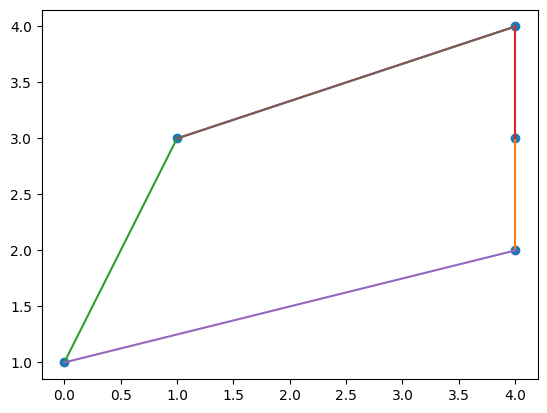

In [17]:
path=list(x.values())[-1]
plot_the_best(path)  
  

episode number 0 total distance 12.359173610000001
episode number 1 total distance 13.23606798
episode number 2 total distance 16.75751924
episode number 3 total distance 12.39834564
episode number 4 total distance 12.87048159
episode number 5 total distance 16.79669127
episode number 6 total distance 16.285383290000002
episode number 7 total distance 16.28538329
episode number 8 total distance 13.23606798
episode number 9 total distance 11.52145127
episode number 10 total distance 16.28538329
episode number 11 total distance 16.285383290000002
episode number 12 total distance 12.870481589999999
episode number 13 total distance 16.79669127
episode number 14 total distance 12.398345639999999
episode number 15 total distance 16.79669127
episode number 16 total distance 16.79669127
episode number 17 total distance 12.359173610000001
episode number 18 total distance 12.87048159
episode number 19 total distance 12.87048159
episode number 20 total distance 12.87048159
episode number 21 total

11.52145127

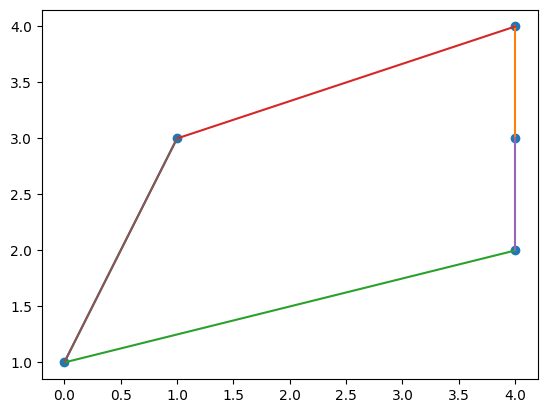

In [18]:
epsilon=1.
e=1000
for episode in range(e):
  state=0
  path=[state]
  q_s_a_loss=[]
  target_loss=[]

  for i in range(n-1):
    action_prob=model(torch.FloatTensor([state]))
    if epsilon > random.random():      
      q_s_a=random.choice(action_prob)
      action=action_prob.tolist().index(q_s_a)
      while action in path:
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
      #print('action explore',action)         
    else:
      sorted_prob=action_prob.argsort(descending=True)
      #print('action_prob',action_prob,'sorted_prob',sorted_prob)
      for i in sorted_prob:
        if i not in path:
          action=i
          q_s_a=action_prob[i]          
          #print('action exploit',action)
          #print('Q(',state,',',int(i),')','=',float(action_prob[i]))
          break
    q_s_a_loss.append(q_s_a)
    
    next_action_prob=model(torch.FloatTensor([action]))
    sorted_prob=next_action_prob.argsort(descending=True)
    #print('next_action_prob',next_action_prob,'sorted_prob',sorted_prob)
    target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]
    target_loss.append(target)

    
    #print('Q(',int(action),',',int(i),')','=',float(next_action_prob[i]))
    


    path.append(int(action))
    state=int(action)

  qloss=torch.stack(q_s_a_loss).sum()
  tloss=torch.stack(target_loss).sum()
  loss=F.mse_loss(qloss,tloss)
  loss.backward()
  #torch.autograd.set_detect_anomaly(True)
  optimizer.step()
  lr_scheduler.step()
  optimizer.zero_grad()

  epsilon=1-episode/e
  path.append(path[0])
  total_dist=0
  for i in range(len(path)-1):
    total_dist+=dist_mat[path[i],path[i+1]]
  print('episode number {} total distance {}'.format(episode,-total_dist))
  if episode==0:
    x[-total_dist]=path
    m.append(-total_dist)
  if episode>0:
    if -total_dist<m[-1]:
      x[-total_dist]=path
      m.append(-total_dist)


distance,path=list(x.keys())[-1],list(x.values())[-1]
plot_the_best(path)
distance
  
  
  

episode number 0 total distance 11.52145127
episode number 1 total distance 12.359173610000001
episode number 2 total distance 12.359173610000001
episode number 3 total distance 12.870481589999999
episode number 4 total distance 11.52145127
episode number 5 total distance 16.285383290000002
episode number 6 total distance 17.634413610000003
episode number 7 total distance 12.359173610000001
episode number 8 total distance 16.79669127
episode number 9 total distance 16.285383290000002
episode number 10 total distance 13.23606798
episode number 11 total distance 16.75751924
episode number 12 total distance 12.359173610000001
episode number 13 total distance 15.919796900000001
episode number 14 total distance 12.398345639999999
episode number 15 total distance 12.398345639999999
episode number 16 total distance 12.87048159
episode number 17 total distance 12.398345639999999
episode number 18 total distance 16.79669127
episode number 19 total distance 16.285383290000002
episode number 20 t

11.52145127

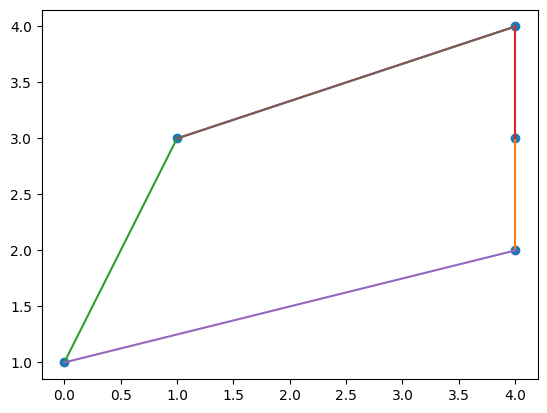

In [19]:
epsilon=1.
e=8000
for episode in range(e):
  state=0
  path=[state]
  q_s_a_loss=[]
  target_loss=[]

  for i in range(n-1):
    action_prob=model(torch.FloatTensor([state]))
    if epsilon > random.random():      
      q_s_a=random.choice(action_prob)
      action=action_prob.tolist().index(q_s_a)
      while action in path:
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
      #print('action explore',action)         
    else:
      sorted_prob=action_prob.argsort(descending=True)
      #print('action_prob',action_prob,'sorted_prob',sorted_prob)
      for i in sorted_prob:
        if i not in path:
          action=i
          q_s_a=action_prob[i]          
          #print('action exploit',action)
          #print('Q(',state,',',int(i),')','=',float(action_prob[i]))
          break
    q_s_a_loss.append(q_s_a)
    
    next_action_prob=model(torch.FloatTensor([action]))
    sorted_prob=next_action_prob.argsort(descending=True)
    #print('next_action_prob',next_action_prob,'sorted_prob',sorted_prob)
    target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]
    target_loss.append(target)

    
    #print('Q(',int(action),',',int(i),')','=',float(next_action_prob[i]))
    


    path.append(int(action))
    state=int(action)

  qloss=torch.stack(q_s_a_loss).sum()
  tloss=torch.stack(target_loss).sum()
  loss=F.mse_loss(qloss,tloss)
  loss.backward()
  #torch.autograd.set_detect_anomaly(True)
  optimizer.step()
  lr_scheduler.step()
  optimizer.zero_grad()

  epsilon=1-episode/e
  path.append(path[0])
  total_dist=0
  for i in range(len(path)-1):
    total_dist+=dist_mat[path[i],path[i+1]]
  print('episode number {} total distance {}'.format(episode,-total_dist))
  if episode==0:
    x[-total_dist]=path
    m.append(-total_dist)
  if episode>0:
    if -total_dist<m[-1]:
      x[-total_dist]=path
      m.append(-total_dist)


distance,path=list(x.keys())[-1],list(x.values())[-1]
plot_the_best(path)
distance
  
  
  

In [20]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from torchsummary import summary
import random

In [21]:
SEED=1
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [22]:
def tensor(ans):
  xv=[]
  for i in range(n):
    if i not in ans:
      xv.append([0,coords[i,0],coords[i,1]])
    else:
      xv.append([1,coords[i,0],coords[i,1]])
  xv=torch.FloatTensor(xv)
  xv=xv.unsqueeze(0)  
  return (xv)

In [23]:

class RLnetwork(nn.Module):
  def __init__(self,hidden1_size,hidden2_size,hidden3_size,hidden4_size,n):
    super().__init__()
    self.layer1=nn.Linear(3,hidden1_size)
    self.hidden1=nn.Linear(hidden1_size,hidden2_size)
    self.hidden2=nn.Linear(hidden2_size,hidden3_size)
    self.hidden3=nn.Linear(hidden3_size,hidden4_size)
    self.hidden4=nn.Linear(hidden4_size,hidden4_size)
    self.out=nn.Linear(hidden4_size,n)

  def forward(self,state):
    layer1=self.layer1(state)
    layer2=F.relu(self.hidden1(layer1))
    layer3=F.relu(self.hidden2(layer2))
    layer4=F.relu(self.hidden3(layer3))
    layer5=F.relu(self.hidden4(layer4))
    output=self.out(layer5)
    return output.sum(dim=1).squeeze(dim=0)


In [24]:
def find_the_best(e):
  loss=0
  epsilon=1.
  
  for episode in range(e):
    state=0
    path=[state]
    
    for i in range(n-1):
      if epsilon > random.random():
        action_prob=model(tensor(path))
        q_s_a=random.choice(action_prob)
        action=action_prob.tolist().index(q_s_a)
        while action in path:
          q_s_a=random.choice(action_prob)
          action=action_prob.tolist().index(q_s_a)
      else:
        action_prob=model(tensor(path))
        sorted_prob=action_prob.argsort(descending=True)
        for i in sorted_prob:
          if i not in path:
            action=i
            q_s_a=action_prob[i]
            break
      
      next_action_prob=model(tensor([action]))
      sorted_prob=next_action_prob.argsort(descending=True)
      target=dist_mat[state,action]+0.9*next_action_prob[sorted_prob[0]]

      

      loss=F.mse_loss(q_s_a,target)
      loss.backward(retain_graph=True)
      torch.autograd.set_detect_anomaly(True)
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      path.append(int(action))
      state=int(action)

    epsilon=1-episode/e
    path.append(path[0])
    total_dist=0
    for i in range(len(path)-1):
      total_dist+=dist_mat[path[i],path[i+1]]
    print('episode number {} total distance {}'.format(episode,-total_dist))

    if episode==0:
      x[-total_dist]=path
      m.append(-total_dist)
    if episode>0:
      if -total_dist<m[-1]:
        x[-total_dist]=path
        m.append(-total_dist)
    #path=list(x.values())[-1]
    #plot_the_best(ans)  
  
  
  #return(path,total_dist)

In [25]:

def plot_the_best(ans):
  plt.scatter(coords[:,0],coords[:,1])
  for i in ans:
    plt.plot([coords[ans[i],0],coords[ans[i+1],0]],[coords[ans[i],1],coords[ans[i+1],1]])

In [26]:
#5 nodes
n=5
model=RLnetwork(64,32,32,32,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 16.285383290000002
episode number 1 total distance 12.359173610000001
episode number 2 total distance 12.87048159
episode number 3 total distance 12.87048159
episode number 4 total distance 15.919796900000001
episode number 5 total distance 16.75751924
episode number 6 total distance 11.52145127
episode number 7 total distance 12.87048159
episode number 8 total distance 16.285383290000002
episode number 9 total distance 16.75751924
episode number 10 total distance 12.359173610000001
episode number 11 total distance 11.52145127
episode number 12 total distance 13.23606798
episode number 13 total distance 16.285383290000002
episode number 14 total distance 13.23606798
episode number 15 total distance 16.285383290000002
episode number 16 total distance 17.63441361
episode number 17 total distance 15.919796900000001
episode number 18 total distance 12.39834564
episode number 19 total distance 16.285383290000002
episode number 20 total distance 15.91979690000

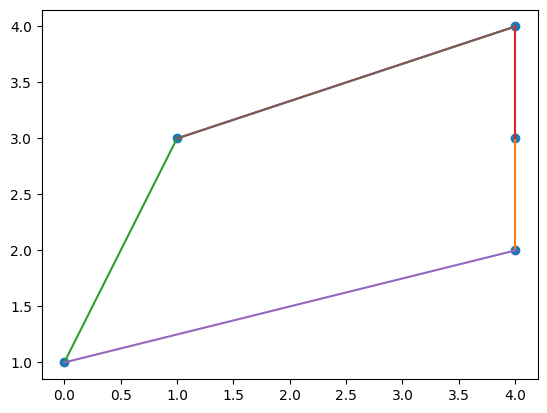

In [27]:
global x,m
x=dict()
m=[]
n=5
coords=np.array([[1, 3],
       [4, 2],
       [4, 4],
       [0, 1],
       [4, 3]])
dist_mat=np.array([[0.        , 3.16227766, 3.16227766, 2.23606798, 3.],
       [3.16227766, 0.        , 2.        , 4.12310563, 1.        ],
       [3.16227766, 2.        , 0.        , 5.        , 1.        ],
       [2.23606798, 4.12310563, 5.        , 0.        , 4.47213595],
       [3.        , 1.        , 1.        , 4.47213595, 0.        ]])
dist_mat*=-1



find_the_best(1000)

ans=list(x.values())[-1]
plot_the_best(ans)

In [28]:
#20 nodes
n=20
model=RLnetwork(64,32,32,32,n)
optimizer = optim.Adam(model.parameters(), lr=5e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=1. - 2e-5)

episode number 0 total distance 8.94675944
episode number 1 total distance 9.53415123
episode number 2 total distance 9.30973825
episode number 3 total distance 10.648599079999999
episode number 4 total distance 10.380212420000001
episode number 5 total distance 9.783602870000001
episode number 6 total distance 8.505557989999998
episode number 7 total distance 10.67588456
episode number 8 total distance 10.22200192
episode number 9 total distance 9.63325745
episode number 10 total distance 10.88168827
episode number 11 total distance 10.450418
episode number 12 total distance 11.14171824
episode number 13 total distance 10.00855176
episode number 14 total distance 9.882451869999999
episode number 15 total distance 11.588795430000003
episode number 16 total distance 7.4789747900000005
episode number 17 total distance 9.93479981
episode number 18 total distance 9.773745109999998
episode number 19 total distance 8.1030534
episode number 20 total distance 8.69747059
episode number 21 total

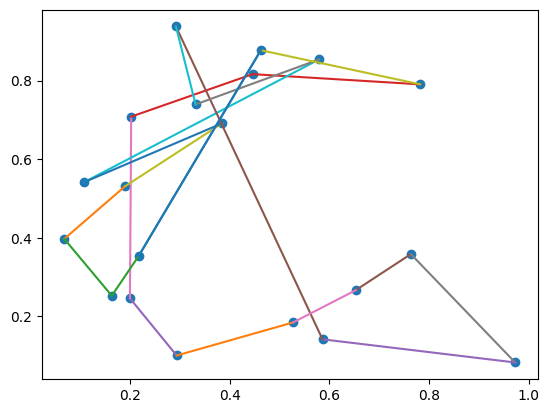

In [29]:
global x,m
m=[]
x=dict()
coords=np.array([[0.46220378, 0.87735237],
       [0.76336427, 0.35838996],
       [0.16299932, 0.25240311],
       [0.21695339, 0.35364676],
       [0.33120199, 0.73937273],
       [0.58597904, 0.14154071],
       [0.29175944, 0.93782709],
       [0.20197353, 0.7083501 ],
       [0.78209567, 0.79055844],
       [0.29320207, 0.10033818],
       [0.52681397, 0.18440201],
       [0.57909509, 0.85391278],
       [0.38499232, 0.69163824],
       [0.19942535, 0.24589808],
       [0.97274202, 0.08255818],
       [0.1897971 , 0.53120319],
       [0.10706641, 0.54124531],
       [0.6525935 , 0.26652373],
       [0.0676014 , 0.39721354],
       [0.44575475, 0.81648304]])
dist_mat=np.array([[-0.        , -0.60001635, -0.69288158, -0.57828654, -0.19026258,
        -0.74614952, -0.18085482, -0.31029269, -0.3314574 , -0.79518088,
        -0.69595595, -0.11921825, -0.20112521, -0.68394958, -0.94464125,
        -0.4404823 , -0.48896882, -0.63981237, -0.62148559, -0.06305272],
       [-0.60001635, -0.        , -0.6096485 , -0.54643148, -0.57611814,
        -0.2801591 , -0.74710006, -0.66153736, -0.43257423, -0.5363238 ,
        -0.2936458 , -0.5286757 , -0.50420209, -0.57504916, -0.34629786,
        -0.59903565, -0.68129507, -0.14390819, -0.69684521, -0.5574272 ],
       [-0.69288158, -0.6096485 , -0.        , -0.11472279, -0.5152005 ,
        -0.43726687, -0.69741322, -0.45760971, -0.82029961, -0.20019115,
        -0.37011518, -0.73140247, -0.49214671, -0.03700231, -0.82736361,
        -0.280085  , -0.29420794, -0.48979777, -0.17340941, -0.63098083],
       [-0.57828654, -0.54643148, -0.11472279, -0.        , -0.40229003,
        -0.42563941, -0.58895042, -0.35501951, -0.71433719, -0.26453563,
        -0.3530685 , -0.61758619, -0.37745903, -0.10916506, -0.80293554,
        -0.17962112, -0.21741289, -0.44426651, -0.1555766 , -0.51630174],
       [-0.19026258, -0.57611814, -0.5152005 , -0.40229003, -0.        ,
        -0.64985727, -0.20233598, -0.13289996, -0.45378969, -0.64016338,
        -0.58843568, -0.27307583, -0.07191649, -0.5107664 , -0.91813886,
        -0.25165433, -0.29915086, -0.57173305, -0.43192382, -0.13808814],
       [-0.74614952, -0.2801591 , -0.43726687, -0.42563941, -0.64985727,
        -0.        , -0.84890351, -0.68464087, -0.67800129, -0.29566197,
        -0.07305885, -0.71240533, -0.58566454, -0.40039258, -0.39123464,
        -0.55569503, -0.6237957 , -0.14162712, -0.57799997, -0.68935477],
       [-0.18085482, -0.74710006, -0.69741322, -0.58895042, -0.20233598,
        -0.84890351, -0.        , -0.24641672, -0.51197429, -0.83749015,
        -0.78924013, -0.29933824, -0.26325144, -0.69806256, -1.09326217,
        -0.41921273, -0.43747985, -0.76213478, -0.5852434 , -0.19605849],
       [-0.31029269, -0.66153736, -0.45760971, -0.35501951, -0.13289996,
        -0.68464087, -0.24641672, -0.        , -0.58591801, -0.61481798,
        -0.61647621, -0.40423899, -0.18378021, -0.46245904, -0.99282405,
        -0.1775649 , -0.19217537, -0.6310855 , -0.33891272, -0.26668711],
       [-0.3314574 , -0.43257423, -0.82029961, -0.71433719, -0.45378969,
        -0.67800129, -0.51197429, -0.58591801, -0.        , -0.84582561,
        -0.65771907, -0.21265702, -0.40923866, -0.79759615, -0.7332192 ,
        -0.64659318, -0.71959818, -0.53979921, -0.81561159, -0.33733856],
       [-0.79518088, -0.5363238 , -0.20019115, -0.26453563, -0.64016338,
        -0.29566197, -0.83749015, -0.61481798, -0.84582561, -0.        ,
        -0.24827655, -0.80598355, -0.59838216, -0.17315241, -0.67977252,
        -0.44309958, -0.47858707, -0.39595434, -0.37286812, -0.73221293],
       [-0.69595595, -0.2936458 , -0.37011518, -0.3530685 , -0.58843568,
        -0.07305885, -0.78924013, -0.61647621, -0.65771907, -0.24827655,
        -0.        , -0.67154895, -0.52668963, -0.33311421, -0.45741009,
        -0.48358187, -0.55093118, -0.15021474, -0.50612738, -0.63725743],
       [-0.11921825, -0.5286757 , -0.73140247, -0.61758619, -0.27307583,
        -0.71240533, -0.29933824, -0.40423899, -0.21265702, -0.80598355,
        -0.67154895, -0.        , -0.25299983, -0.71682005, -0.86599412,
        -0.50566234, -0.5661908 , -0.59196952, -0.6857113 , -0.13849416],
       [-0.20112521, -0.50420209, -0.49214671, -0.37745903, -0.07191649,
        -0.58566454, -0.26325144, -0.18378021, -0.40923866, -0.59838216,
        -0.52668963, -0.25299983, -0.        , -0.48282438, -0.84642083,
        -0.25266693, -0.31600766, -0.50232732, -0.43292366, -0.13884631],
       [-0.68394958, -0.57504916, -0.03700231, -0.10916506, -0.5107664 ,
        -0.40039258, -0.69806256, -0.46245904, -0.79759615, -0.17315241,
        -0.33311421, -0.71682005, -0.48282438, -0.        , -0.79037877,
        -0.28546752, -0.30945139, -0.45363729, -0.20068363, -0.62148642],
       [-0.94464125, -0.34629786, -0.82736361, -0.80293554, -0.91813886,
        -0.39123464, -1.09326217, -0.99282405, -0.7332192 , -0.67977252,
        -0.45741009, -0.86599412, -0.84642083, -0.79037877, -0.        ,
        -0.90237746, -0.97968778, -0.3692403 , -0.9582732 , -0.90352714],
       [-0.4404823 , -0.59903565, -0.280085  , -0.17962112, -0.25165433,
        -0.55569503, -0.41921273, -0.1775649 , -0.64659318, -0.44309958,
        -0.48358187, -0.50566234, -0.25266693, -0.28546752, -0.90237746,
        -0.        , -0.08333794, -0.53313762, -0.18134226, -0.38327394],
       [-0.48896882, -0.68129507, -0.29420794, -0.21741289, -0.29915086,
        -0.6237957 , -0.43747985, -0.19217537, -0.71959818, -0.47858707,
        -0.55093118, -0.5661908 , -0.31600766, -0.30945139, -0.97968778,
        -0.08333794, -0.        , -0.610796  , -0.14934068, -0.43642365],
       [-0.63981237, -0.14390819, -0.48979777, -0.44426651, -0.57173305,
        -0.14162712, -0.76213478, -0.6310855 , -0.53979921, -0.39595434,
        -0.15021474, -0.59196952, -0.50232732, -0.45363729, -0.3692403 ,
        -0.53313762, -0.610796  , -0.        , -0.5994127 , -0.58756916],
       [-0.62148559, -0.69684521, -0.17340941, -0.1555766 , -0.43192382,
        -0.57799997, -0.5852434 , -0.33891272, -0.81561159, -0.37286812,
        -0.50612738, -0.6857113 , -0.43292366, -0.20068363, -0.9582732 ,
        -0.18134226, -0.14934068, -0.5994127 , -0.        , -0.56461214],
       [-0.06305272, -0.5574272 , -0.63098083, -0.51630174, -0.13808814,
        -0.68935477, -0.19605849, -0.26668711, -0.33733856, -0.73221293,
        -0.63725743, -0.13849416, -0.13884631, -0.62148642, -0.90352714,
        -0.38327394, -0.43642365, -0.58756916, -0.56461214, -0.        ]])


find_the_best(4000)

path=list(x.values())[-1]
plot_the_best(path)
print(list(x)[-1])

In [30]:
!pip install --upgrade pip
!pip install pandas

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


euclidean method: Total distance = 1046.7853240873421, Visited cities = [60, 21, 79, 80, 27, 59, 67, 37, 35, 42, 81, 88, 10, 41, 0, 90, 58, 7, 92, 24, 32, 22, 28, 43, 47, 86, 54, 14, 83, 55, 2, 49, 23, 1, 3, 45, 91, 61, 16, 85, 48, 95, 11, 99, 29, 19, 76, 94, 5, 56, 57, 52, 75, 69, 84, 82, 98, 39, 77, 25, 38, 17, 31, 68, 36, 26, 53, 50, 20, 89, 8, 64, 70, 97, 30, 51, 73, 40, 9, 34, 6, 65, 63, 15, 78, 4, 93, 96, 46, 87, 74, 33, 13, 72, 62, 66, 44, 12, 71, 18]
cityblock method: Total distance = 1361.0, Visited cities = [44, 56, 30, 0, 90, 15, 98, 69, 40, 42, 25, 7, 45, 89, 87, 6, 32, 59, 5, 71, 20, 86, 36, 48, 37, 52, 31, 60, 46, 51, 93, 22, 75, 62, 76, 91, 63, 53, 39, 80, 79, 1, 19, 84, 47, 23, 54, 78, 27, 16, 92, 68, 70, 88, 85, 28, 2, 13, 99, 94, 55, 82, 35, 96, 9, 61, 72, 83, 57, 73, 17, 64, 38, 29, 43, 66, 18, 11, 26, 34, 49, 77, 58, 12, 33, 50, 74, 65, 81, 95, 10, 21, 41, 8, 67, 4, 14, 3, 24, 97]


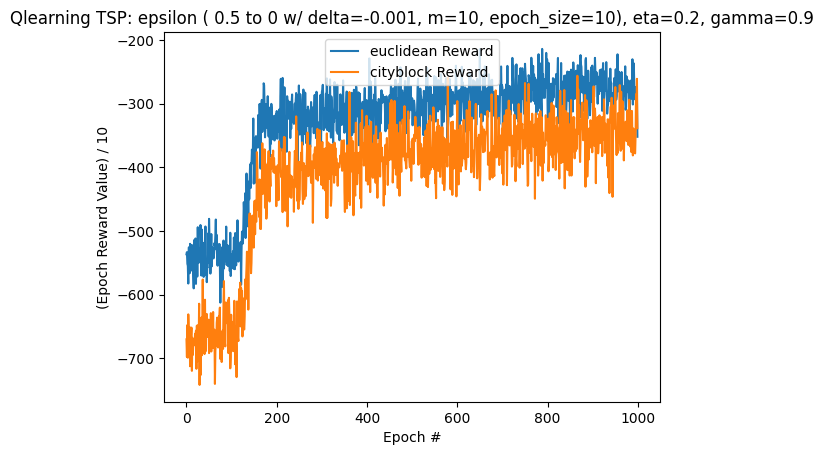

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

MAP_SIZE = 100
N_CITIES = 100
N_EPOCHS = 1000
EPOCH_SIZE = 10         # how many games to play per training epoch
METHODS = ["euclidean", "cityblock"]
INIT_EPSILON = 0.5      # probability of choosing a random action
EPSILON_MIN =  0        # when to stop decreasing epsilon by delta
E_DELTA = 0.001         # how much to change epsilon by ever M epochs
M = 10                  # number of epochs to pass before decreasing epsilon
ETA = 0.2               # learning rate
GAMMA = 0.9             # discount factor

def generate_city_coords(env_data):
  """
  generate N_CITIES cities with coordinates being integer values
  representing the horizontal and vertical cells within the map grid
  with height and width equal to MAP_SIZE
  """
  c = np.random.randint(100, size=(N_CITIES, 2))
  env_data["x_coords"] = c[:,0]
  env_data["y_coords"] = c[:,1]

def generate_q_vals(env_data):
  """
  populates env["q_cities"] with q values for the cities based on the method
  or heuristic in use
  assumes valid method that is present in METHODS is provided
  the method will be provided directly to cdist, so it must also be a valid
  parameter for that function.
  methods such as euclidean and manhattan (cityblock) distance work
  """
  # given x and y coords lists, column_stack generates a list of lists
  # of the [[x,y],..] coordinate pairs
  c = np.column_stack([env_data["x_coords"], env_data["y_coords"]])
  env_data["q_cities"] = cdist(c, c, env_data["method"])

def reset_cities(env_data):
  """
  replaces env_data["cities"] with an empty list, appends a random city id to it
  and retuns it
  """
  env_data["cities"] = []
  first_city_id = np.random.randint(N_CITIES)  # pick a random city for start
  env_data["cities"].append(first_city_id)
  return first_city_id

def get_action(agent_data, start_city):
  """
  either picks the best city out of the q-vector for that starting city
  or picks a random city from the non-visited ones
  and returns that city index as the action
  """
  q_vector = np.copy(agent_data["qmatrix"][start_city,:])
  visited = agent_data["states"]
  q_vector[visited] = -np.inf  # don't visit already visted cities
  if np.random.rand() > agent_data["epsilon"]:
    action = np.argmax(q_vector)  # best action index with highest q value
  else:  # otherwise, choose random non-visited action
    action = np.random.choice([x for x in range(q_vector.size) if x not in visited])
  return action

def do_action(env_data, next_city):
  """
  gets the current city
  appends the provided next city to the list of cities (state) in this env
  gets the reward value for the trip between the current city and the next one
  returns the reward
  """
  cur_city = env_data["cities"][-1]  # last city appended
  env_data["cities"].append(next_city) # append new_city to cities visited
  r = env_data["q_cities"][cur_city, next_city]
  return r

def train(agent_data, state, action, reward):
  """
  trains an agent with agent data:
  updates q matrix of the agent with newly calculated value for that
  state,action pair based on the formula for q learning
  next_state is action because we have encoded actions as the list of city
  indexes
  """
  next_state = action
  agent_data["qmatrix"][state, action] = \
    agent_data["qmatrix"][state, action] + ETA * (reward + \
      GAMMA * np.max(agent_data["qmatrix"][next_state, action]) - \
      agent_data["qmatrix"][state, action])

def run_training_epoch(env_data, agent_data):
  i = 0
  epoch_r = 0
  done = False
  start_city = reset_cities(env_data)
  agent_data["states"] = []
  while i < env_data["n_cities"] and not done:
    agent_data["states"].append(start_city)
    action = get_action(agent_data, start_city)  # next city to visit
    r = do_action(env_data, action)  # expected reward for doing so
    done = len(env_data["cities"]) == env_data["n_cities"]
    r = -1 * r
    train(agent_data, start_city, action, r)
    epoch_r += r
    start_city = action
    i += 1
  return epoch_r

def run_n_epochs(env_data, agent_data, n_epochs=1000):
  """
  runs n_epochs training epochs for agent with provided agent and environment
  data
  returns the modified environment, agent and a list of the rewards for
  the entire training period
  """
  rewards = []
  for i in range(n_epochs):
    rewards.append(run_training_epoch(env_data, agent_data))
    if i > 0 and i % M == 0:  # decrease epsilon by delta every M epochs
      agent_data["epsilon"] -= E_DELTA
  return rewards
  

def test_agent(env_data, agent_data):
  start_city = np.random.randint(env_data["n_cities"])
  visited_cities = [start_city]
  total_distance = 0
  for _ in range(env_data["n_cities"] - 1):
    current_city = visited_cities[-1]
    q_values = agent_data["qmatrix"][current_city, :]
    q_values[visited_cities] = -np.inf  # ignore visited cities

    next_city = np.argmax(q_values)

    visited_cities.append(next_city)

    total_distance += env_data["q_cities"][current_city, next_city]

  return total_distance, visited_cities


def plot_stats(rewards):
  """
  plots both rewards for each iteration of both methods
  """
  columns = ['Epoch']
  stats = []
  columns.append(METHODS[0])
  columns.append(METHODS[1])
  i = 0
  for r in rewards[METHODS[0]]:
    stats.append([
      i,
      rewards[METHODS[0]][i]/EPOCH_SIZE,
      rewards[METHODS[1]][i]/EPOCH_SIZE])
    i += 1
  df = pd.DataFrame(stats, columns=columns)
  plt.title("Qlearning TSP: " +
            "epsilon ( {} to 0 w/ delta=-{}, m={}, epoch_size={}), ".format(
            INIT_EPSILON, E_DELTA, M, EPOCH_SIZE) + "eta={}, gamma={}".format(
            ETA, GAMMA))
  plt.xlabel("Epoch #")
  plt.ylabel("(Epoch Reward Value) / {}".format(EPOCH_SIZE))
  plt.plot(df["Epoch"], df[METHODS[0]], label='{} Reward'.format(METHODS[0]))
  plt.plot(df["Epoch"], df[METHODS[1]], label='{} Reward'.format(METHODS[1]))
  plt.legend(loc='upper center')
  plt.show()

def main():
  """
  entry point of program
  runs qlearning training with two different methods, records the rewards
  per epoch for each method and graphs them for comparison
  """
  rewards = {}
  for method in METHODS:
    env_data = {
      "n_cities" : N_CITIES,
      "method" : method,
      "x_coords" : [],
      "y_coords" : [],
      "q_cities" : [],
      "cities" : [],
    }
    tsp_qagent_data = {
     "states_size" : N_CITIES,
     "actions_size" : N_CITIES,
     "epsilon" : INIT_EPSILON,
     "qmatrix" : np.zeros([N_CITIES, N_CITIES]),
     "states" : []
    }
    generate_city_coords(env_data)
    generate_q_vals(env_data)
    reset_cities(env_data)
    rewards[method] = run_n_epochs(env_data, tsp_qagent_data, N_EPOCHS)
    
    total_distance, visited_cities = test_agent(env_data, tsp_qagent_data)
    print(f"{method} method: Total distance = {total_distance}, Visited cities = {visited_cities}")
  plot_stats(rewards)


if __name__ == "__main__":
  main()